In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf

In [2]:
#import the data
CADCHF = yf.Ticker("CADCHF=X")

In [3]:
data = yf.download("CADCHF=X", start="2017-01-01", end="2022-08-10")['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

Date
2017-01-02    0.75439
2017-01-03    0.76183
2017-01-04    0.76400
2017-01-05    0.76697
2017-01-06    0.76321
Name: Adj Close, dtype: float64

In [5]:
data.tail()

Date
2022-08-04    0.74772
2022-08-05    0.74126
2022-08-08    0.74328
2022-08-09    0.74276
2022-08-10    0.73990
Name: Adj Close, dtype: float64

In [6]:
log_returns = np.log(1 + data.pct_change())

In [7]:
log_returns.tail()

Date
2022-08-04    0.005498
2022-08-05   -0.008677
2022-08-08    0.002721
2022-08-09   -0.000700
2022-08-10   -0.003858
Name: Adj Close, dtype: float64

Text(0, 0.5, 'Price CAD')

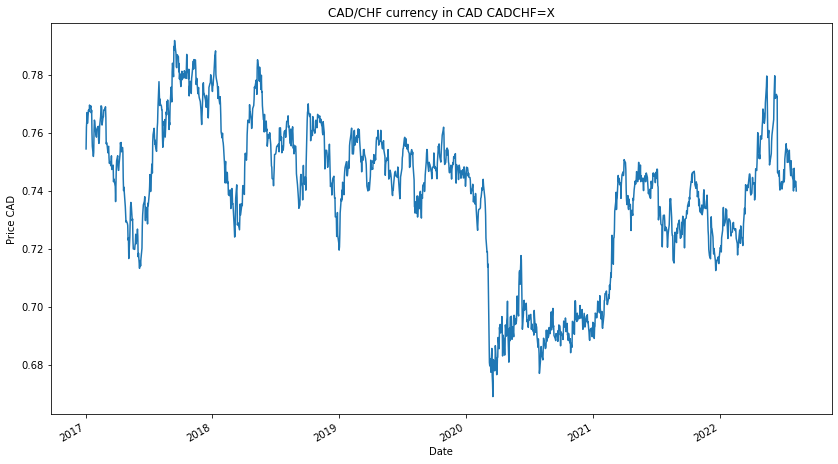

In [8]:
data.plot(figsize=(14,8))
plt.title('CAD/CHF currency in CAD CADCHF=X')
plt.ylabel('Price CAD')

In [9]:
u = log_returns.mean()
u

-1.3274774120360284e-05

In [10]:
var = log_returns.var()
var

2.406700074624333e-05

In [11]:
stdev = log_returns.std()
stdev

0.004905812954673601

In [12]:
drift = u - (0.5 * var)
drift

-2.530827449348195e-05

In [13]:
np.array(drift)

array(-2.53082745e-05)

In [14]:
np.array(stdev)

array(0.00490581)

In [15]:
#set up a 96% chance of occurance
norm.ppf(0.96)

1.7506860712521692

In [16]:
x = np.random.rand(10,2)
x

array([[0.58192645, 0.088651  ],
       [0.47404648, 0.29972428],
       [0.68297209, 0.01043819],
       [0.87515402, 0.59032412],
       [0.9606975 , 0.14040742],
       [0.00921576, 0.56229579],
       [0.22651525, 0.90950904],
       [0.35723614, 0.3593407 ],
       [0.35115617, 0.03340255],
       [0.39480232, 0.89131467]])

In [17]:
norm.ppf(x)

array([[ 0.20682427, -1.34910889],
       [-0.06510179, -0.52519369],
       [ 0.47602606, -2.31021287],
       [ 1.15109792,  0.22837882],
       [ 1.75883815, -1.07849068],
       [-2.3568334 ,  0.15679244],
       [-0.75037232,  1.33773778],
       [-0.36585633, -0.36022163],
       [-0.38220091, -1.83298294],
       [-0.26682405,  1.2335499 ]])

In [18]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.43218702,  1.22773277],
       [-1.37651522, -0.30933972],
       [ 1.9815266 ,  0.33471184],
       [-0.15369578, -0.34044465],
       [-0.63296663, -0.48552666],
       [ 0.32559207,  0.40769893],
       [ 0.85768707,  0.66304882],
       [-0.37397481,  0.5184317 ],
       [-0.41714511,  0.04131739],
       [-1.29811241,  0.838905  ]])

In [19]:
t_intervals = 120
interations = 500

In [20]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, interations)))
daily_returns

array([[1.00320694, 0.99441705, 0.99377763, ..., 1.00502163, 1.00475289,
        1.00076224],
       [1.00100773, 0.98898902, 1.00341684, ..., 1.00724776, 1.01117727,
        1.00541853],
       [0.99662939, 0.99851127, 1.00115049, ..., 0.99407037, 0.99534901,
        0.99262706],
       ...,
       [0.99801676, 0.99970906, 0.99867337, ..., 0.99791907, 0.99405379,
        0.99874776],
       [1.00043325, 1.00634107, 1.00065026, ..., 0.99429944, 0.99224136,
        1.00729592],
       [1.00134822, 1.00143611, 1.00722631, ..., 0.99978224, 0.99933536,
        1.00540918]])

In [21]:
s_zero = data.iloc[-1]
s_zero

0.7398999929428101

In [22]:
price_list = np.zeros_like(daily_returns)

In [23]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
price_list[0] = s_zero
price_list

array([[0.73989999, 0.73989999, 0.73989999, ..., 0.73989999, 0.73989999,
        0.73989999],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [25]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [26]:
price_list

array([[0.73989999, 0.73989999, 0.73989999, ..., 0.73989999, 0.73989999,
        0.73989999],
       [0.74064561, 0.73175297, 0.74242811, ..., 0.74526261, 0.74817006,
        0.74390917],
       [0.73814918, 0.73066359, 0.74328227, ..., 0.74084348, 0.74469033,
        0.73842437],
       ...,
       [0.71696096, 0.7515964 , 0.78132775, ..., 0.77913899, 0.72541784,
        0.724092  ],
       [0.71727158, 0.75636232, 0.78183582, ..., 0.77469747, 0.71978958,
        0.72937491],
       [0.71823862, 0.75744854, 0.78748561, ..., 0.77452877, 0.71931118,
        0.73332023]])

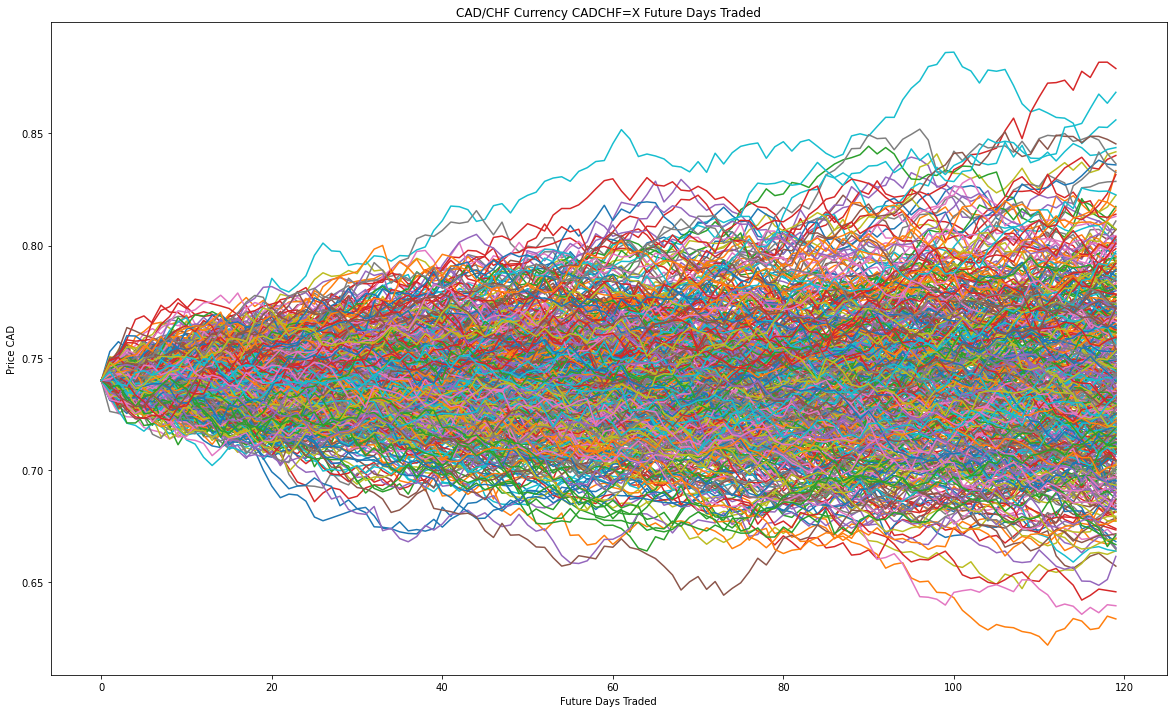

In [27]:
plt.figure(figsize=(20,12))
plt.title('CAD/CHF Currency CADCHF=X Future Days Traded')
plt.xlabel('Future Days Traded')
plt.ylabel('Price CAD')
plt.plot(price_list)